In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#判断会员生命周期函数
def life(x,y):
    if x<=30:
        if y<=10:
            return 0
        else:
            return 1
    elif x<=90:
        return 2
    else:
        return 3
#判断会员是否活跃函数
def whether(x):
    if x<=1:
        return 1
    else:
        return 0
def act(x):
    if x<=30:
        return 1
    else:
        return 0
#判断会员新旧函数
def djtime(x):
    if x<=365:
        return 0
    elif x<=1095:
        return 1
    else:
        return 2
#最小二乘法
def LeastSquares(x, y,data_num): #y = a*x^2 + b*x + c
    sumx=0
    sumx2=0
    sumx3=0
    sumx4=0
    sumy=0
    sumxy=0
    sumx2y=0
    D=0

    if(data_num==0) :
        return false;
    else:
        for i in range(0,data_num,1):
            sumx+=x[i]
            sumy+=y[i]
            sumx2+=pow (x[i],2)
            sumxy+=x[i]*y[i]
            sumx3+=pow(x[i],3)
            sumx2y+=pow(x[i],2)*y[i]
            sumx4+=pow(x[i],4)
    D = sumx2*sumx2*sumx2 + sumx*sumx*sumx4 + data_num*sumx3*sumx3 - data_num*sumx2*sumx4 - 2*sumx*sumx2*sumx3;
    a = (sumy*(sumx2*sumx2-sumx*sumx3) + sumxy*(data_num*sumx3-sumx*sumx2) + sumx2y*(sumx*sumx-data_num*sumx2))/D;
    b = (sumy*(sumx*sumx4-sumx2*sumx3) + sumxy*(sumx2*sumx2-data_num*sumx4) + sumx2y*(data_num*sumx3-sumx*sumx2))/D;
    c = (sumy*(sumx3*sumx3-sumx2*sumx4) + sumxy*(sumx*sumx4-sumx2*sumx3) + sumx2y*(sumx2*sumx2-sumx*sumx3))/D;
    return a,b,c

In [2]:
#问题三数据预处理
data=pd.read_excel('/Users/ymz/Desktop/附件3-会员消费明细表.xlsx')
data_2=pd.read_excel('/Users/ymz/Desktop/附件1-会员信息表.xlsx')
print(data)
print(data_2)

              kh                   dtime      spbm  sl      sj       je  \
0       5bfd4a2e 2016-05-08 11:32:25.436  9096d06f   1  1250.0  1125.00   
1       0a69471f 2016-05-08 13:40:25.483  9096d06f   1  1850.0  1665.00   
2       0a69471f 2016-05-08 13:40:25.483  9096d06f   1   695.0   625.50   
3       49e89b58 2016-05-08 14:08:05.626  9096d06f   1  1300.0  1170.00   
4       49e89b58 2016-05-08 14:08:05.626  9096d06f   1  1400.0  1260.00   
...          ...                     ...       ...  ..     ...      ...   
911697  6e8a0e15 2018-01-03 16:34:38.953  601573c3   1  8704.0  8704.00   
911698  d3db5de8 2018-01-03 17:42:58.953  4c63f495   1  3590.0  3536.66   
911699  d3db5de8 2018-01-03 17:42:58.953  4c63f495   1  3140.0  3093.34   
911700  54858fc6 2018-01-03 19:17:19.953  46d797ab   1  9784.8  9784.80   
911701  c183ce7e 2018-01-03 19:44:35.953  46d797ab   1  7984.8  7984.80   

              spmc      jf  syjh   djh  gzbm       gzmc  
0            素然B价件     0.0   232  25bb  3

In [3]:
data['dtime'] = pd.to_datetime(data['dtime'])
data['year']=data['dtime'].dt.year
data_new = data[['kh','je','year','sl','dtime']]
data_new

,kh,je,year,sl,dtime
0,5bfd4a2e,1125.00,2016,1,2016-05-08 11:32:25.436
1,0a69471f,1665.00,2016,1,2016-05-08 13:40:25.483
2,0a69471f,625.50,2016,1,2016-05-08 13:40:25.483
3,49e89b58,1170.00,2016,1,2016-05-08 14:08:05.626
4,49e89b58,1260.00,2016,1,2016-05-08 14:08:05.626
...,...,...,...,...,...
911697,6e8a0e15,8704.00,2018,1,2018-01-03 16:34:38.953
911698,d3db5de8,3536.66,2018,1,2018-01-03 17:42:58.953
911699,d3db5de8,3093.34,2018,1,2018-01-03 17:42:58.953
911700,54858fc6,9784.80,2018,1,2018-01-03 19:17:19.953


In [4]:
#构建RF模型
data_new = data_new[data_new.year>2016]
data_new['年月日'] = data_new['dtime'].apply(lambda x:x.strftime('%Y%m%d'))
data_new

<ipython-input-4-e4c714d7791b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['年月日'] = data_new['dtime'].apply(lambda x:x.strftime('%Y%m%d'))


,kh,je,year,sl,dtime,年月日
349909,2884f4f7,5112.00,2017,1,2017-10-27 21:28:11.080,20171027
349910,b451913c,2287.00,2017,1,2017-10-27 13:00:16.796,20171027
349911,eb519d79,2069.00,2017,1,2017-10-27 13:33:13.796,20171027
349912,eb519d79,2069.00,2017,1,2017-10-27 13:33:13.796,20171027
349913,eb519d79,2069.00,2017,1,2017-10-27 13:36:11.813,20171027
...,...,...,...,...,...,...
911697,6e8a0e15,8704.00,2018,1,2018-01-03 16:34:38.953,20180103
911698,d3db5de8,3536.66,2018,1,2018-01-03 17:42:58.953,20180103
911699,d3db5de8,3093.34,2018,1,2018-01-03 17:42:58.953,20180103
911700,54858fc6,9784.80,2018,1,2018-01-03 19:17:19.953,20180103


In [5]:
data_new.year.unique()

array([2017, 2018], dtype=int64)

In [6]:
data_new['end_time'] = '2018-01-03'
pd.to_datetime(data_new.end_time)
data_days = pd.DataFrame(pd.to_datetime(data_new.end_time)-pd.to_datetime(data_new['年月日']),columns=['R'])
data_new2 = pd.concat([data_new,data_days],axis=1)
data_new2

<ipython-input-6-e3530d9f261f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['end_time'] = '2018-01-03'


,kh,je,year,sl,dtime,年月日,end_time,R
349909,2884f4f7,5112.00,2017,1,2017-10-27 21:28:11.080,20171027,2018-01-03,68 days
349910,b451913c,2287.00,2017,1,2017-10-27 13:00:16.796,20171027,2018-01-03,68 days
349911,eb519d79,2069.00,2017,1,2017-10-27 13:33:13.796,20171027,2018-01-03,68 days
349912,eb519d79,2069.00,2017,1,2017-10-27 13:33:13.796,20171027,2018-01-03,68 days
349913,eb519d79,2069.00,2017,1,2017-10-27 13:36:11.813,20171027,2018-01-03,68 days
...,...,...,...,...,...,...,...,...
911697,6e8a0e15,8704.00,2018,1,2018-01-03 16:34:38.953,20180103,2018-01-03,0 days
911698,d3db5de8,3536.66,2018,1,2018-01-03 17:42:58.953,20180103,2018-01-03,0 days
911699,d3db5de8,3093.34,2018,1,2018-01-03 17:42:58.953,20180103,2018-01-03,0 days
911700,54858fc6,9784.80,2018,1,2018-01-03 19:17:19.953,20180103,2018-01-03,0 days


In [7]:
data_new2.R = data_new2.R.map(lambda x:str(x).split(' ')[0])
data_new2.R = data_new2.R.map(lambda x:int(x))
data_new2.kh = data_new2.kh.map(lambda x:str(x).split(' ')[0])
data_R = data_new2.groupby('kh').agg({'R':'min'}).reset_index()
data_R

,kh,R
0,000186fa,101
1,000234ad,63
2,000339f1,18
3,0004bad2,69
4,000539ab,63
...,...,...
48795,fff8f4c0,65
48796,fffa7c0b,349
48797,fffa98bb,318
48798,fffae578,140


In [8]:
data_F = data_new2.groupby('kh').agg(F=pd.NamedAgg(column='kh',aggfunc='count')).reset_index()
data_F

,kh,F
0,000186fa,4
1,000234ad,1
2,000339f1,4
3,0004bad2,2
4,000539ab,1
...,...,...
48795,fff8f4c0,19
48796,fffa7c0b,3
48797,fffa98bb,8
48798,fffae578,3


In [9]:
data_RF=pd.merge(data_R,data_F,on="kh",how="inner")

In [10]:
data_RF.columns=['kh','R','F']
data_RF

,kh,R,F
0,000186fa,101,4
1,000234ad,63,1
2,000339f1,18,4
3,0004bad2,69,2
4,000539ab,63,1
...,...,...,...
48795,fff8f4c0,65,19
48796,fffa7c0b,349,3
48797,fffa98bb,318,8
48798,fffae578,140,3


In [11]:
#将会员按RF指标分类
score=map(life,data_RF.R,data_RF.F)
data_SC=pd.DataFrame(score,columns=['score'])
data_RFSC=pd.merge(data_RF,data_SC,on=None,how="inner",left_index=True,right_index=True)
data_RFSC

,kh,R,F,score
0,000186fa,101,4,3
1,000234ad,63,1,2
2,000339f1,18,4,0
3,0004bad2,69,2,2
4,000539ab,63,1,2
...,...,...,...,...
48795,fff8f4c0,65,19,2
48796,fffa7c0b,349,3,3
48797,fffa98bb,318,8,3
48798,fffae578,140,3,3


In [12]:
data_K=data_RFSC.groupby('score').agg(K=pd.NamedAgg(column='score',aggfunc='count')).reset_index()
data_K

,score,K
0,0,5535
1,1,3818
2,2,10114
3,3,29333


In [13]:
active=map(whether,data_K.score)
data_A=pd.DataFrame(active,columns=['active'])
data_KA=pd.merge(data_K,data_A,on=None,how="inner",left_index=True,right_index=True)
data_Ac=data_KA.groupby('active').agg(K=pd.NamedAgg(column='K',aggfunc='sum')).reset_index()
data_Ac

,active,K
0,0,39447
1,1,9353


In [14]:
#处理附件一数据，生成每位会员入会时长
data_kh = data_2[['kh','djsj']]
data_kh = data_kh.dropna()
data_kh['djsj'] = pd.to_datetime(data_kh['djsj'])
data_kh['年月日'] = data_kh['djsj'].apply(lambda x:x.strftime('%Y%m%d'))
data_kh['end_time'] = '2018-01-03'
pd.to_datetime(data_kh.end_time)
data_days2 = pd.DataFrame(pd.to_datetime(data_kh.end_time)-pd.to_datetime(data_kh['年月日']),columns=['djsc'])
data_kh2 = pd.concat([data_kh,data_days2],axis=1)
data_djsc = data_kh2[['kh','djsc']]
data_djsc.djsc = data_djsc.djsc.map(lambda x:str(x).split(' ')[0])
data_djsc.djsc = data_djsc.djsc.map(lambda x:int(x))
data_djsc.kh = data_djsc.kh.map(lambda x:str(x).split(' ')[0])
data_djsc

D:\anaconda\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,kh,djsc
0,c68b20b4,1698
1,1ca15332,4808
2,a37cc182,4751
3,2ab88539,2602
4,b4c77269,3673
...,...,...
194755,716746bc,1527
194757,4e14ad22,1587
194758,f20299a8,1387
194759,a3a27f12,1030


In [15]:
#与之前结果合并
data_gx=pd.merge(data_RFSC,data_djsc,on="kh",how="inner")
DJtime=map(djtime,data_gx.djsc)
data_GX=pd.DataFrame(DJtime,columns=['djtime'])
data_GX=pd.merge(data_gx,data_GX,on=None,how="inner",left_index=True,right_index=True)
data_GX

,kh,R,F,score,djsc,djtime
0,000186fa,101,4,3,718,1
1,000234ad,63,1,2,3212,2
2,000339f1,18,4,0,1569,2
3,0004bad2,69,2,2,1682,2
4,000539ab,63,1,2,547,1
...,...,...,...,...,...,...
28215,ffed8ebe,275,2,3,275,0
28216,ffef1c66,281,1,3,281,0
28217,fff02abe,36,1,2,36,0
28218,fff31d1c,101,5,3,1723,2


In [16]:
#按会员新旧分类统计分析其与会员活跃度的关系
data_GX0= data_GX[data_GX.djtime==0]
data_GX1= data_GX[data_GX.djtime==1]
data_GX2= data_GX[data_GX.djtime==2]
gx_0=np.zeros(4)
gx_1=np.zeros(4)
gx_2=np.zeros(4)
for i in range(0,4):
    gx_0[i] = (list(data_GX0.score).count(i)/np.size(data_GX0.score))
for i in range(0,4):
    gx_1[i] = (list(data_GX1.score).count(i)/np.size(data_GX1.score))
for i in range(0,4):
    gx_2[i] = (list(data_GX2.score).count(i)/np.size(data_GX2.score))
print(gx_0)
print(gx_1)
print(gx_2)

[0.12201037 0.05184814 0.17519652 0.65094497]
[0.10064881 0.16336716 0.21177841 0.52420562]
[0.11189152 0.0970637  0.21344259 0.57760219]


In [17]:
#问题四数据预处理
data_new2 = data_new2[data_new2.year<2018].reset_index()
data_new2['month']=data_new2['dtime'].dt.month
data_new2r=pd.merge(data_R,data_new2,on="kh",how="inner")
data_new2r

,kh,R_x,index,je,year,sl,dtime,年月日,end_time,R_y,month
0,000186fa,101,802303,2250.0,2017,1,2017-09-24 12:47:35.986,20170924,2018-01-03,101,9
1,000186fa,101,802304,792.0,2017,1,2017-09-24 12:47:35.986,20170924,2018-01-03,101,9
2,000186fa,101,802305,612.0,2017,1,2017-09-24 12:47:35.986,20170924,2018-01-03,101,9
3,000186fa,101,802306,522.0,2017,1,2017-09-24 12:47:35.986,20170924,2018-01-03,101,9
4,000234ad,63,835108,398.0,2017,1,2017-11-01 16:43:04.126,20171101,2018-01-03,63,11
...,...,...,...,...,...,...,...,...,...,...,...
386581,fffb655f,129,767143,621.0,2017,1,2017-08-27 12:00:33.796,20170827,2018-01-03,129,8
386582,fffb655f,129,767263,3060.0,2017,2,2017-08-27 12:02:25.796,20170827,2018-01-03,129,8
386583,fffb655f,129,767264,3600.0,2017,2,2017-08-27 12:02:25.796,20170827,2018-01-03,129,8
386584,fffb655f,129,767265,990.0,2017,1,2017-08-27 12:02:25.796,20170827,2018-01-03,129,8


In [18]:
Active=map(act,data_new2r.R_y)
data_a=pd.DataFrame(Active,columns=['Active'])
data_a

,Active
0,0
1,0
2,0
3,0
4,0
...,...
386581,0
386582,0
386583,0
386584,0


In [19]:
data_newa=pd.merge(data_new2,data_a,on=None,how="inner",left_index=True,right_index=True)
data_newa

,index,kh,je,year,sl,dtime,年月日,end_time,R,month,Active
0,349909,2884f4f7,5112.00,2017,1,2017-10-27 21:28:11.080,20171027,2018-01-03,68,10,0
1,349910,b451913c,2287.00,2017,1,2017-10-27 13:00:16.796,20171027,2018-01-03,68,10,0
2,349911,eb519d79,2069.00,2017,1,2017-10-27 13:33:13.796,20171027,2018-01-03,68,10,0
3,349912,eb519d79,2069.00,2017,1,2017-10-27 13:33:13.796,20171027,2018-01-03,68,10,0
4,349913,eb519d79,2069.00,2017,1,2017-10-27 13:36:11.813,20171027,2018-01-03,68,10,0
...,...,...,...,...,...,...,...,...,...,...,...
386581,907472,e668be40,1009.91,2017,1,2017-12-31 15:54:59.890,20171231,2018-01-03,3,12,0
386582,907473,e668be40,628.09,2017,1,2017-12-31 15:54:59.890,20171231,2018-01-03,3,12,0
386583,907474,e668be40,1440.00,2017,1,2017-12-31 16:52:02.923,20171231,2018-01-03,3,12,0
386584,907475,373995a5,1359.00,2017,1,2017-12-31 17:00:51.936,20171231,2018-01-03,3,12,0


In [20]:
data_month1 = data_newa[data_newa.month==1]
data_month2 = data_newa[data_newa.month==2]
data_month3 = data_newa[data_newa.month==3]
data_month4 = data_newa[data_newa.month==4]
data_month5 = data_newa[data_newa.month==5]
data_month6 = data_newa[data_newa.month==6]
data_month7 = data_newa[data_newa.month==7]
data_month8 = data_newa[data_newa.month==8]
data_month9 = data_newa[data_newa.month==9]
data_month10 = data_newa[data_newa.month==10]
data_month11 = data_newa[data_newa.month==11]
data_month12 = data_newa[data_newa.month==12]

In [21]:
je=np.zeros(12)
Actrate=np.zeros(12)
Chgrate=np.zeros(12)

In [22]:
#统计月销售额
je[0]=sum(data_month1.je)
je[1]=sum(data_month2.je)
je[2]=sum(data_month3.je)
je[3]=sum(data_month4.je)
je[4]=sum(data_month5.je)
je[5]=sum(data_month6.je)
je[6]=sum(data_month7.je)
je[7]=sum(data_month8.je)
je[8]=sum(data_month9.je)
je[9]=sum(data_month10.je)
je[10]=sum(data_month11.je)
je[11]=sum(data_month12.je)
je

array([52181562.47999983, 31155181.90000002, 46645196.28999991,
       36062148.53999993, 39954229.70000019, 34413449.25999968,
       37235751.11999995, 47777679.92000026, 55465081.33000109,
       38459753.10000002, 68200820.82000221, 47981021.90000026])

In [23]:
data_1month=data_month1.groupby('kh').agg({'Active':'min'}).reset_index()
data_2month=data_month2.groupby('kh').agg({'Active':'min'}).reset_index()
data_3month=data_month3.groupby('kh').agg({'Active':'min'}).reset_index()
data_4month=data_month4.groupby('kh').agg({'Active':'min'}).reset_index()
data_5month=data_month5.groupby('kh').agg({'Active':'min'}).reset_index()
data_6month=data_month6.groupby('kh').agg({'Active':'min'}).reset_index()
data_7month=data_month7.groupby('kh').agg({'Active':'min'}).reset_index()
data_8month=data_month8.groupby('kh').agg({'Active':'min'}).reset_index()
data_9month=data_month9.groupby('kh').agg({'Active':'min'}).reset_index()
data_10month=data_month10.groupby('kh').agg({'Active':'min'}).reset_index()
data_11month=data_month11.groupby('kh').agg({'Active':'min'}).reset_index()
data_12month=data_month12.groupby('kh').agg({'Active':'min'}).reset_index()

In [24]:
#计算会员活跃比与激活率
Actrate[0]=sum(data_1month.Active)/np.size(data_1month.Active)
Actrate[1]=sum(data_2month.Active)/np.size(data_2month.Active)
Actrate[2]=sum(data_3month.Active)/np.size(data_3month.Active)
Actrate[3]=sum(data_4month.Active)/np.size(data_4month.Active)
Actrate[4]=sum(data_5month.Active)/np.size(data_5month.Active)
Actrate[5]=sum(data_6month.Active)/np.size(data_6month.Active)
Actrate[6]=sum(data_7month.Active)/np.size(data_7month.Active)
Actrate[7]=sum(data_8month.Active)/np.size(data_8month.Active)
Actrate[8]=sum(data_9month.Active)/np.size(data_9month.Active)
Actrate[9]=sum(data_10month.Active)/np.size(data_10month.Active)
Actrate[10]=sum(data_11month.Active)/np.size(data_11month.Active)
Actrate[11]=sum(data_12month.Active)/np.size(data_12month.Active)
Actrate

array([0.03447566, 0.04175647, 0.03655235, 0.03980397, 0.04017183,
       0.03873381, 0.03653635, 0.03742204, 0.03818293, 0.03562508,
       0.03510321, 0.03626661])

In [25]:
for i in range(1,12):
    Chgrate[i]=Actrate[i]-Actrate[i-1]
Chgrate

array([ 0.        ,  0.0072808 , -0.00520412,  0.00325162,  0.00036786,
       -0.00143803, -0.00219745,  0.00088568,  0.0007609 , -0.00255785,
       -0.00052187,  0.0011634 ])

8.904363836855372e-18 x^2+ -9.39465050601797e-10 x+ 0.023429107446679042
数组长度： 12


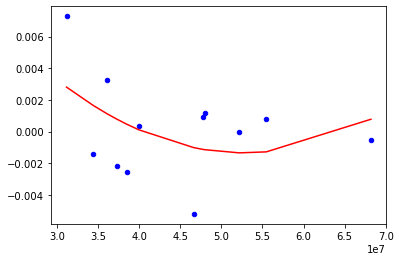

In [26]:
#线性拟合
result=np.zeros(12)
a,b,c=LeastSquares(je,Chgrate,len(je))
print(a,"x^2+",b,"x+",c)
print("数组长度：", len(je))
je_new=sorted(je)
for i in range(0, len(je), 1):
    result[i]=(a*(je_new[i]**2)) + (b*je_new[i]) + c
plt.scatter(je,Chgrate,s=20, alpha=1,color="blue",marker="o")
plt.plot(je_new, result,color="red")
plt.show()